In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [7]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf

# **folder Paths**

In [ ]:
import os
import cv2
import numpy as np

# Define the root directory where your 'Training' and 'Testing' folders are stored
root_dir = r"C:\Users\path"  # Use raw string
image_size = 150
labels = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]

X_train = []
Y_train = []

# Load Training Data
for label in labels:
    folderPath = os.path.join(root_dir, "Training", label)
    for filename in os.listdir(folderPath):
        img_path = os.path.join(folderPath, filename)
        img = cv2.imread(img_path)
        if img is not None:  # Ensure the image was loaded successfully
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            Y_train.append(label)

# Load Testing Data
for label in labels:
    folderPath = os.path.join(root_dir, "Testing", label)
    for filename in os.listdir(folderPath):
        img_path = os.path.join(folderPath, filename)
        img = cv2.imread(img_path)
        if img is not None:  # Ensure the image was loaded successfully
            img = cv2.resize(img, (image_size, image_size))
            X_train.append(img)
            Y_train.append(label)

# Convert lists to numpy arrays for easier processing in machine learning
X_train = np.array(X_train)
Y_train = np.array(Y_train)

print("Data loading complete. Shape of X_train:", X_train.shape)
print("Number of labels:", len(Y_train))


Data loading complete. Shape of X_train: (3264, 150, 150, 3)
Number of labels: 3264


In [9]:
X_train =np.array(X_train)
Y_train =np.array(Y_train)

In [10]:
X_train , Y_train = shuffle(X_train,Y_train,random_state=101)
X_train.shape

(3264, 150, 150, 3)

# **Train Test Split**

In [11]:
X_train , X_test , y_train , y_test = train_test_split(X_train , Y_train , test_size=0.1 , random_state=101)

# **Neural Network**

In [12]:
y_train_new=[]
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)
y_test_new=[]
for j in y_test:
    y_test_new.append(labels.index(j))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

A Convo Block 
[Conv2D 
Conv2D 
MaxPooling2D
Dropout]X3
+[(Output Block)]

An Output Block
[Flatten
Dense(parameters to be trained on )
Dropout
Dense(specify Classification numbers)]

In [13]:
model = Sequential()
#Conv2D Block(1)
model.add(Conv2D(32, (3, 3), input_shape=(150, 150, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
#Conv2D Block(2)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
#Conv2D Block(3)
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
#Conv2D Block(4)
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))
#Output Block
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(4, activation='softmax'))


c:\Users\surya\anaconda3\envs\UltOrg\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 146, 146, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 73, 73, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 71, 71, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 69, 69, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 34, 34, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 30, 30, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 15, 15, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 13, 13, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,719,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,331,012 (20.34 MB)

 Trainable params: 5,331,012 (20.34 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [16]:
history= model.fit(X_train , y_train,epochs=100,validation_split=0.2)

Epoch 1/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 131s 2s/step - accuracy: 0.2980 - loss: 10.7339 - val_accuracy: 0.4762 - val_loss: 1.2213
Epoch 2/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 104s 1s/step - accuracy: 0.4785 - loss: 1.2071 - val_accuracy: 0.5221 - val_loss: 1.0376
Epoch 3/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 109s 1s/step - accuracy: 0.5684 - loss: 1.0015 - val_accuracy: 0.6207 - val_loss: 0.8787
Epoch 4/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.6266 - loss: 0.9032 - val_accuracy: 0.6616 - val_loss: 0.7949
Epoch 5/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 100s 1s/step - accuracy: 0.6709 - loss: 0.8054 - val_accuracy: 0.7007 - val_loss: 0.7469
Epoch 6/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 101s 1s/step - accuracy: 0.6937 - loss: 0.7349 - val_accuracy: 0.6888 - val_loss: 0.6525
Epoch 7/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 96s 1s/step - accuracy: 0.7543 - loss: 0.5915 - val_accuracy: 0.7993 - val_loss: 0.5343
Epoch 8/100
74/74 ━━━━━━━━━━━━━━━━━━━━ 93s 1s/step - accuracy: 0.8131 - loss: 0.4920 - val_accuracy: 0.8

KeyboardInterrupt: 

In [17]:
model.save('braintumor.h5')

In [18]:
acc= history.history['accuracy']
valacc=history.history['val_accuracy']
epochs= range(len(acc))

NameError: name 'history' is not defined

In [16]:
import matplotlib.pyplot as plt 
import seaborn

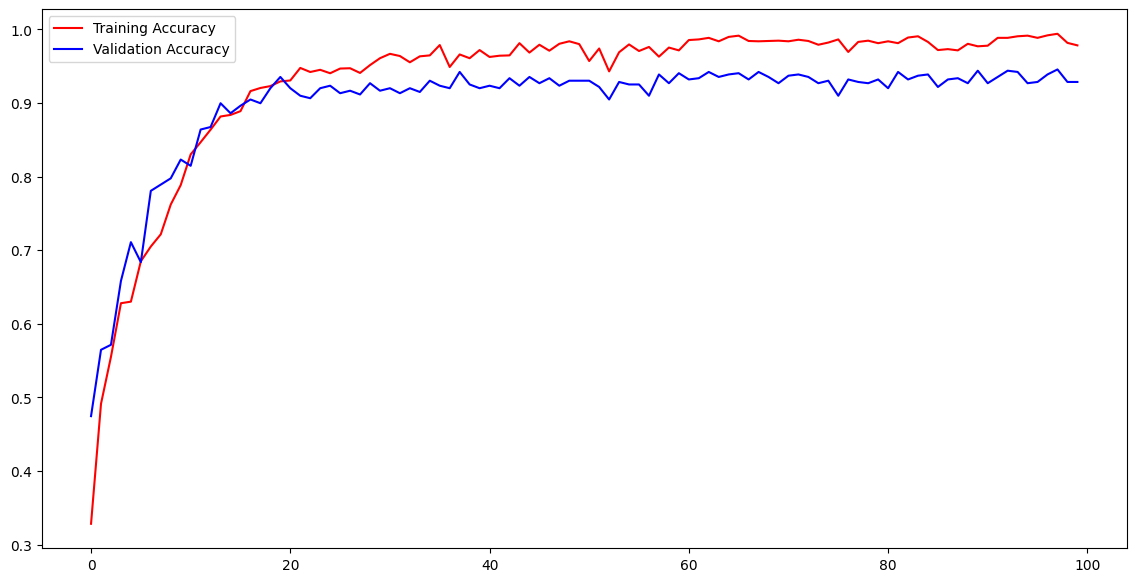

In [20]:
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,valacc,'b',label='Validation Accuracy')
plt.legend(loc='upper left')
plt.show()

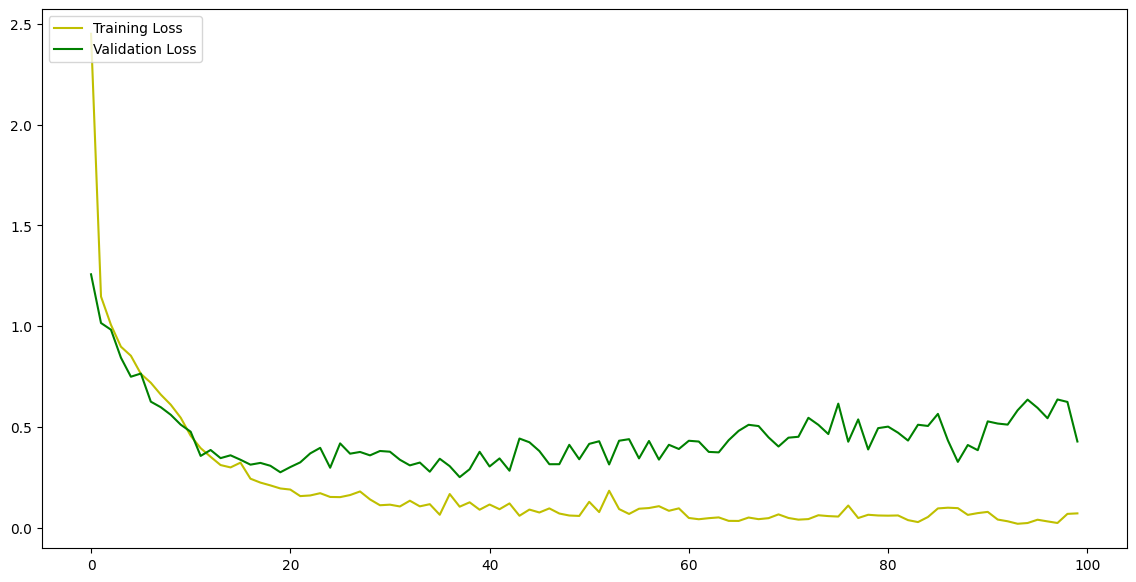

In [21]:
acc= history.history['loss']
valacc=history.history['val_loss']
epochs= range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'y',label='Training Loss')
plt.plot(epochs,valacc,'g',label='Validation Loss')
plt.legend(loc='upper left')
plt.show()

**OBJECT TO BE PREDICTED**

In [ ]:
path='pictuure_path'

In [1]:
from tensorflow.keras.models import load_model
model = load_model('braintumor.h5')

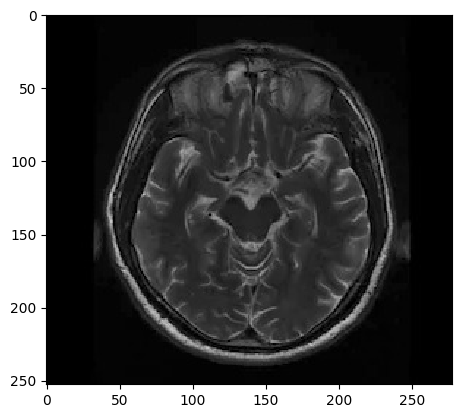

In [45]:
from keras.preprocessing import image
img = cv2.imread(path)
img= cv2.resize(img,(150,150))
img_array= np.array(img)
img_array = img_array.reshape(1,150,150,3)
img = image.load_img(path)
plt.imshow(img,interpolation ='nearest')

In [46]:
a=model.predict(img_array)
indices = a.argmax()
if indices == 0:
    print('Glioma Tumor Founded')
elif indices == 1:
    print('meningioma Tumor Founded')
elif indices == 3:
    print('pituitary Tumor Founded')
else:
    print("No Tumor Founded")
    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
No Tumor Founded
